<a href="https://colab.research.google.com/github/tushant-akar/CS367-Artifical-Intelligence-Lab/blob/main/Gaussian_HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM


[*********************100%***********************]  1 of 1 completed


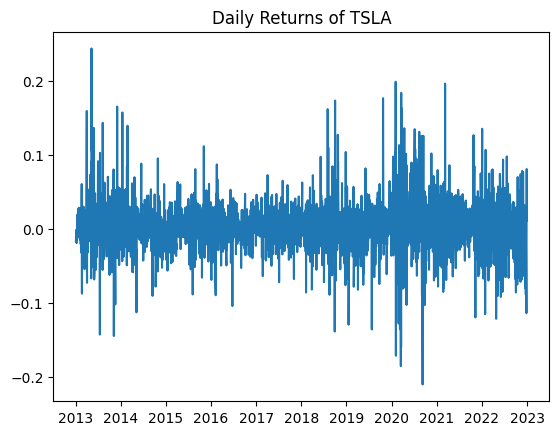

In [ ]:
# Download historical data for Tesla (TSLA) over the last 10 years
data = yf.download("TSLA", start="2013-01-01", end="2023-01-01")

# Extract adjusted closing prices
data['Returns'] = data['Adj Close'].pct_change().dropna()

# Drop missing values
returns = data['Returns'].dropna()

# Plot the returns
plt.plot(returns)
plt.title("Daily Returns of TSLA")
plt.show()


In [ ]:
# Reshape the returns data for HMM (HMM expects a 2D array)
X = np.array(returns).reshape(-1, 1)

# Create and fit a Gaussian HMM model with 2 hidden states
hmm_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
hmm_model.fit(X)

# Predict hidden states
hidden_states = hmm_model.predict(X)

# Analyze the mean and variance of each hidden state
for i in range(hmm_model.n_components):
    print(f"Hidden State {i}")
    print(f"Mean: {hmm_model.means_[i]}")
    print(f"Variance: {np.diag(hmm_model.covars_[i])}")


Hidden State 0
Mean: [0.00385767]
Variance: [0.00369681]
Hidden State 1
Mean: [0.00166671]
Variance: [0.00050093]


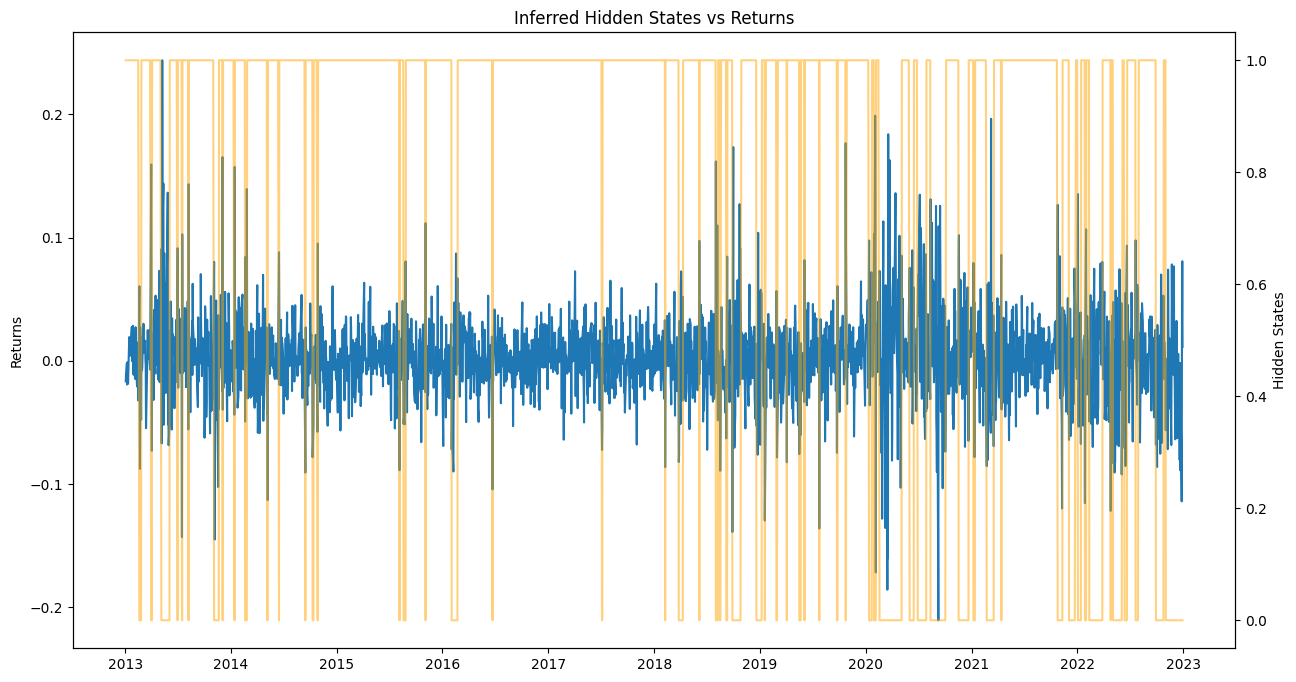

In [ ]:
# Create a DataFrame to store dates, returns, and hidden states
df = pd.DataFrame({
    'Date': returns.index,
    'Returns': returns.values,
    'Hidden State': hidden_states
})

# Plot hidden states over time
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot the returns
ax1.plot(df['Date'], df['Returns'], label="Returns")
ax1.set_ylabel('Returns')

# Plot the hidden states as background
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Hidden State'], color='orange', label="Hidden States", alpha=0.5)
ax2.set_ylabel('Hidden States')

plt.title('Inferred Hidden States vs Returns')
plt.show()


Transition Matrix
[[0.81144532 0.18855468]
 [0.06355932 0.93644068]]


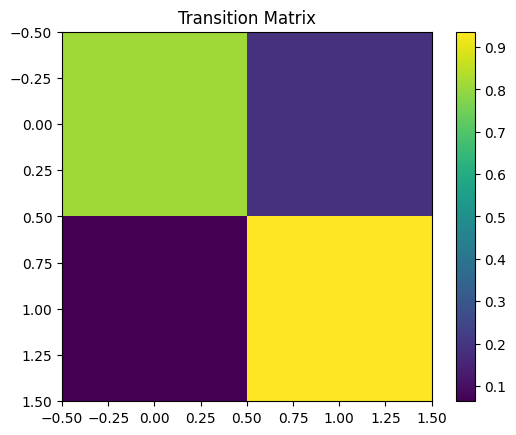

In [ ]:
# Transition matrix
print("Transition Matrix")
print(hmm_model.transmat_)

# Visualizing the transition matrix
plt.imshow(hmm_model.transmat_, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Transition Matrix')
plt.show()


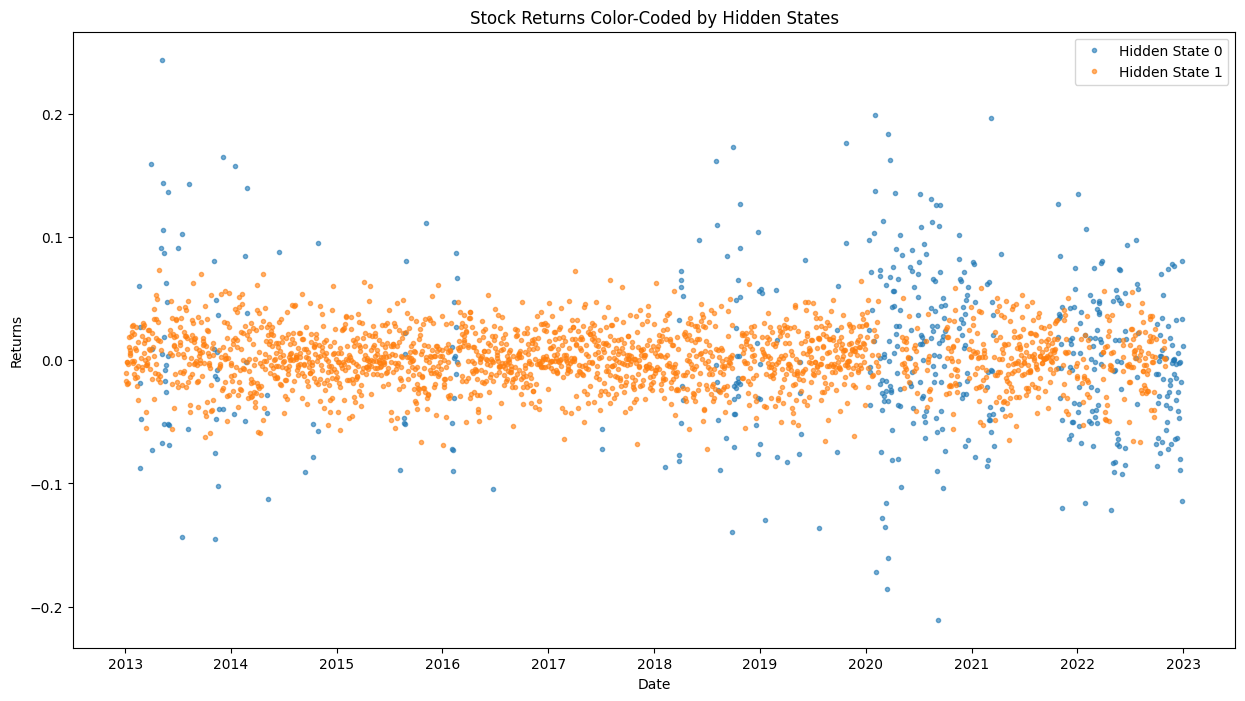

In [ ]:
hidden_states = hmm_model.predict(X)
# Plotting the returns color-coded by hidden states
plt.figure(figsize=(15, 8))

for state in range(hmm_model.n_components):
    state_mask = (df['Hidden State'] == state)
    plt.plot(df['Date'][state_mask], df['Returns'][state_mask],
             '.', label=f"Hidden State {state}", alpha=0.6)

plt.title("Stock Returns Color-Coded by Hidden States")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()

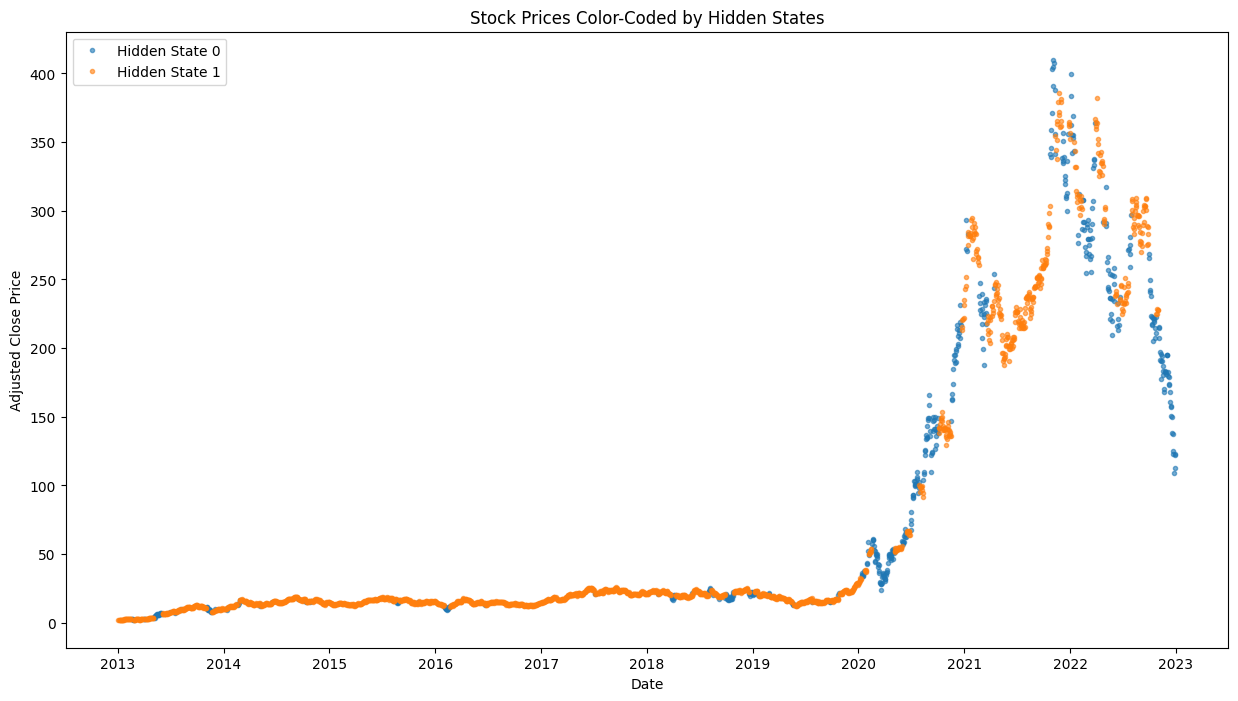

In [ ]:
# Align the stock prices and hidden states based on the returns (dropping NaNs)
returns_cleaned = returns.dropna()

# Ensure the lengths match
hidden_states = hmm_model.predict(X)  # X corresponds to returns

# Create a DataFrame with dates, returns, and hidden states
df_prices = pd.DataFrame({
    'Date': returns_cleaned.index,   # Use the index from the cleaned returns
    'Adj Close': data.loc[returns_cleaned.index, 'Adj Close'],  # Match with adjusted close prices
    'Hidden State': hidden_states
})

# Plot stock prices with hidden states
plt.figure(figsize=(15, 8))

for state in range(hmm_model.n_components):
    state_mask = (df_prices['Hidden State'] == state)
    plt.plot(df_prices['Date'][state_mask], df_prices['Adj Close'][state_mask],
             '.', label=f"Hidden State {state}", alpha=0.6)

plt.title("Stock Prices Color-Coded by Hidden States")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()